In [1]:
import math
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from random import sample
from PIL import Image

In [2]:
IMG_DIR = '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/images/'
MASK_DIR = '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/groundtruth/'

In [19]:
def plot_mask_distr(mask_dir):
    mask_files = list(sorted(os.listdir(mask_dir)))
    
    mask_files = [f for f in mask_files if f.endswith('.png')]
    
    mask_distr = []
    for mask_file in mask_files:
        mask_path = os.path.join(mask_dir, mask_file)
    
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
        mask_distr.append(np.mean(mask))

    return mask_distr
    plt.hist(mask_distr, bins=30, color='blue', edgecolor='black')
    plt.title('Distribution of Mean Pixel Intensities in Masks')
    plt.xlabel('Mean Pixel Intensity')
    plt.ylabel('Number of Images')
    plt.grid(True)
    plt.show()

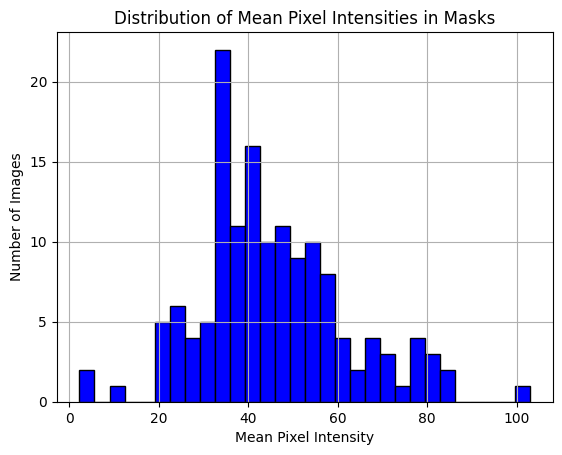

In [17]:
plot_mask_distr(MASK_DIR+"eth")

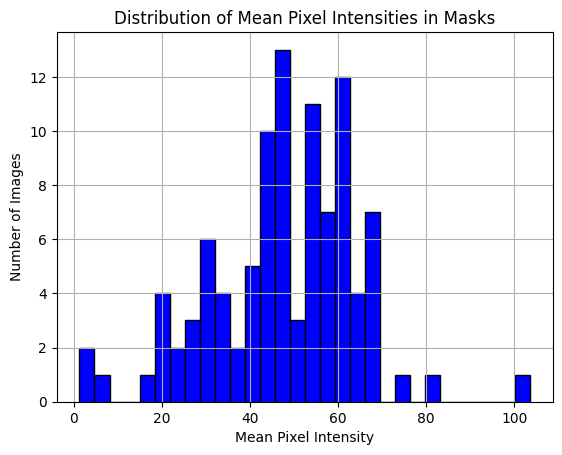

In [15]:
plot_mask_distr(MASK_DIR+"epfl")

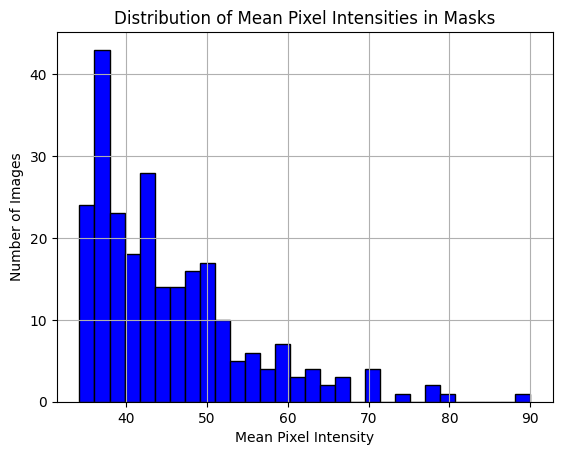

In [16]:
plot_mask_distr(MASK_DIR+"deepglobe_small")

In [29]:
eth_means = plot_mask_distr(MASK_DIR+"eth")

In [49]:
dg_means = plot_mask_distr(MASK_DIR+"deepglobe_filtered")

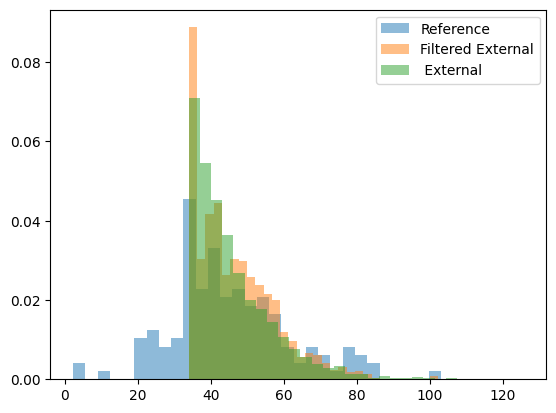

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def stratified_sampling(reference_means, external_means, num_bins=30):
    # Calculate histogram for the reference dataset
    ref_hist, bin_edges = np.histogram(reference_means, bins=num_bins)
    ref_proportions = ref_hist / ref_hist.sum()  # Proportion of images in each bin

    # Calculate histogram for the external dataset
    ext_hist, _ = np.histogram(external_means, bins=bin_edges)

    # Determine target number of images per bin in the external dataset
    target_counts = (ref_proportions * ext_hist.sum()).astype(int)

    # Stratified sampling: select images from the external dataset
    selected_indices = []
    for i in range(num_bins):
        bin_start, bin_end = bin_edges[i], bin_edges[i + 1]
        bin_indices = np.where((external_means >= bin_start) & (external_means < bin_end))[0]

        if len(bin_indices) >= target_counts[i]:
            # Randomly select target_counts[i] indices from bin_indices
            selected_indices.extend(np.random.choice(bin_indices, target_counts[i], replace=False))
        else:
            # If not enough samples, take all available and note potential imbalance
            selected_indices.extend(bin_indices)

    return selected_indices

# Example usage with dummy data
reference_means = eth_means
external_means = dg_means

selected_indices = stratified_sampling(reference_means, external_means, num_bins=30)

# External set masks filtered by selected_indices
filtered_external_means = [external_means[i] for i in selected_indices]

# Visualizing the comparison
plt.hist(reference_means, bins=30, alpha=0.5, label='Reference', density=True)
plt.hist(filtered_external_means, bins=30, alpha=0.5, label='Filtered External', density=True)
plt.hist(dg_means, bins=30, alpha=0.5, label=' External', density=True)

plt.legend()
plt.show()


In [51]:
len(filtered_external_means)

2904

In [52]:
len(dg_means)

4011

In [47]:
mask_dir = MASK_DIR+"epfl"
mask_files = list(sorted(os.listdir(mask_dir)))

mask_files = [f for f in mask_files if f.endswith('.png')]

keep = []
for mask_file in mask_files:
    mask_path = os.path.join(mask_dir, mask_file)

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    if np.mean(mask) in filtered_external_means:
        keep.append(mask_path)

In [48]:
keep

['/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/groundtruth/epfl/satImage_001.png',
 '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/groundtruth/epfl/satImage_004.png',
 '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/groundtruth/epfl/satImage_005.png',
 '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/groundtruth/epfl/satImage_007.png',
 '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/groundtruth/epfl/satImage_009.png',
 '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/groundtruth/epfl/satImage_012.png',
 '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/groundtruth/epfl/satImage_015.png',
 '/Users/sebastian/University/Master/second_term/cil/road-segmentation/data/training/groundtruth/epfl/satImage_017.png',
 '/Users/sebastian/University/Ma